In [1]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from matplotlib.colors import BoundaryNorm


In [2]:
def convert_to_float(x):
    return float(x.decode("utf-8"))

In [3]:
def dunn_idx(X,labels,centroids,distances):
    
    # Calculate within-cluster scatter (W)
    within_cluster_distances = []
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        cluster_distances = pairwise_distances(cluster_points, [centroids[i]])
        within_cluster_distances.extend(cluster_distances)
    W = np.mean(within_cluster_distances)

    # Calculate between-cluster separation (B)
    between_cluster_distances = []
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            cluster_distance = np.linalg.norm(centroids[i] - centroids[j])
            between_cluster_distances.append(cluster_distance)
    B = min(between_cluster_distances)

    # Calculate Dunn's Index
    dunn_index = W / B
    return dunn_index

In [4]:
#Xi_Beni_idx
def Xi_Beni_idx(X,labels,centroids):
    # Calculate pairwise distances between all points
    distances = pairwise_distances(X)

    # Calculate within-cluster scatter (W)
    within_cluster_distances = []
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        cluster_distances = pairwise_distances(cluster_points, [centroids[i]])
        within_cluster_distances.extend(cluster_distances)
    W = np.mean(within_cluster_distances)

    # Calculate between-cluster separation (B)
    between_cluster_distances = []
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            cluster_distance = np.linalg.norm(centroids[i] - centroids[j])
            between_cluster_distances.append(cluster_distance)
    B = np.mean(between_cluster_distances)
    XB_index = W / B
    # Calculate Xi-Beni (XB) Index
    return XB_index

In [5]:
TripA01_l = np.loadtxt("TripA01.csv", delimiter=";", skiprows=1, dtype=str, encoding='unicode_escape')
TripA02_l = np.loadtxt("TripA02.csv", delimiter=";", skiprows=1, dtype=str, encoding='unicode_escape')
TripA03_l = np.loadtxt("TripA03.csv", delimiter=";", skiprows=1, dtype=str, encoding='unicode_escape')
TripA04_l = np.loadtxt("TripA04.csv", delimiter=";", skiprows=1, dtype=str, encoding='unicode_escape')
TripA05_l = np.loadtxt("TripA05.csv", delimiter=";", skiprows=1, dtype=str, encoding='unicode_escape')
'''
TripA06_l = np.loadtxt("TripA06.csv", delimiter=";", skiprows=1, dtype=str, encoding='unicode_escape')
TripA07_l = np.loadtxt("TripA07.csv", delimiter=";", skiprows=1, dtype=str, encoding='unicode_escape')
TripA08_l = np.loadtxt("TripA08.csv", delimiter=";", skiprows=1, dtype=str, encoding='unicode_escape')
TripA09_l = np.loadtxt("TripA09.csv", delimiter=";", skiprows=1, dtype=str, encoding='unicode_escape')
TripA10_l = np.loadtxt("TripA10.csv", delimiter=";", skiprows=1, dtype=str, encoding='unicode_escape')
'''
columns_to_delete = list(range(0, 7)) + list(range(10, TripA01_l.shape[1]))
TripA01_s = np.delete(TripA01_l, columns_to_delete, axis=1)
TripA01 = TripA01_s.astype(float)

columns_to_delete = list(range(0, 7)) + list(range(10, TripA02_l.shape[1]))
TripA02_s = np.delete(TripA02_l, columns_to_delete, axis=1)
TripA02 = TripA02_s.astype(float)

columns_to_delete = list(range(0, 7)) + list(range(10, TripA03_l.shape[1]))
TripA03_s = np.delete(TripA03_l, columns_to_delete, axis=1)
TripA03 = TripA03_s.astype(float)

columns_to_delete = list(range(0, 7)) + list(range(10, TripA04_l.shape[1]))
TripA04_s = np.delete(TripA04_l, columns_to_delete, axis=1)
TripA04 = TripA04_s.astype(float)

columns_to_delete = list(range(0, 7)) + list(range(10, TripA05_l.shape[1]))
TripA05_s = np.delete(TripA05_l, columns_to_delete, axis=1)
TripA05 = TripA05_s.astype(float)
'''
columns_to_delete = list(range(0, 7)) + list(range(10, TripA06_l.shape[1]))
TripA06_s = np.delete(TripA06_l, columns_to_delete, axis=1)
TripA06 = TripA06_s.astype(float)

columns_to_delete = list(range(0, 7)) + list(range(10, TripA07_l.shape[1]))
TripA07_s = np.delete(TripA07_l, columns_to_delete, axis=1)
TripA07 = TripA07_s.astype(float)

columns_to_delete = list(range(0, 7)) + list(range(10, TripA08_l.shape[1]))
TripA08_s = np.delete(TripA08_l, columns_to_delete, axis=1)
TripA08 = TripA08_s.astype(float)

columns_to_delete = list(range(0, 7)) + list(range(10, TripA09_l.shape[1]))
TripA09_s = np.delete(TripA09_l, columns_to_delete, axis=1)
TripA09 = TripA09_s.astype(float)

columns_to_delete = list(range(0, 7)) + list(range(10, TripA10_l.shape[1]))
TripA10_s = np.delete(TripA10_l, columns_to_delete, axis=1)
TripA10 = TripA10_s.astype(float)
'''
Bat_dataset = np.concatenate((TripA01,TripA02,TripA03,TripA04)) 
''' TripA05,TripA06,TripA07,TripA08,TripA09,TripA10)''' 
print(f'TripA01: {TripA01}')
print(f'TripA02: {TripA02}')
print(f'TripA03: {TripA03}')
print(f'TripA04: {TripA04}')
print(f'TripA05: {TripA05}')
'''
print(f'TripA06: {TripA06}')
print(f'TripA07: {TripA07}')
print(f'TripA08: {TripA08}')
print(f'TripA09: {TripA09}')
print(f'TripA10: {TripA10}')
'''
print(f'Bat_dataset: {Bat_dataset}')


TripA01: [[ 3.9140e+02 -2.2000e+00  2.1000e+01]
 [ 3.9140e+02 -2.2100e+00  2.1000e+01]
 [ 3.9140e+02 -2.2600e+00  2.1000e+01]
 ...
 [ 3.8801e+02 -1.6200e+00  2.2000e+01]
 [ 3.8806e+02 -9.2000e-01  2.2000e+01]
 [ 3.8810e+02 -3.0000e-01  2.2000e+01]]
TripA02: [[381.8  -37.6   23.  ]
 [381.8  -37.62  23.  ]
 [381.8  -37.67  23.  ]
 ...
 [382.5    8.29  26.  ]
 [382.5    8.14  26.  ]
 [382.5    8.    26.  ]]
TripA03: [[390.3   -6.2   24.  ]
 [390.3   -6.2   24.  ]
 [390.33  -6.42  24.  ]
 ...
 [386.9   -1.7   25.  ]
 [386.9   -1.7   25.  ]
 [386.9   -1.7   25.  ]]
TripA04: [[386.8   -1.7   25.  ]
 [386.8   -1.7   25.  ]
 [386.8   -1.7   25.  ]
 ...
 [380.72 -19.88  27.  ]
 [380.73 -19.79  27.  ]
 [380.78 -19.49  27.  ]]
TripA05: [[380.6  -18.8   27.  ]
 [380.6  -18.96  27.  ]
 [380.6  -19.16  27.  ]
 ...
 [377.7   -3.3   27.  ]
 [377.7   -3.2   27.  ]
 [377.7   -3.05  27.  ]]
Bat_dataset: [[391.4   -2.2   21.  ]
 [391.4   -2.21  21.  ]
 [391.4   -2.26  21.  ]
 ...
 [380.72 -19.88  27.  ]
 

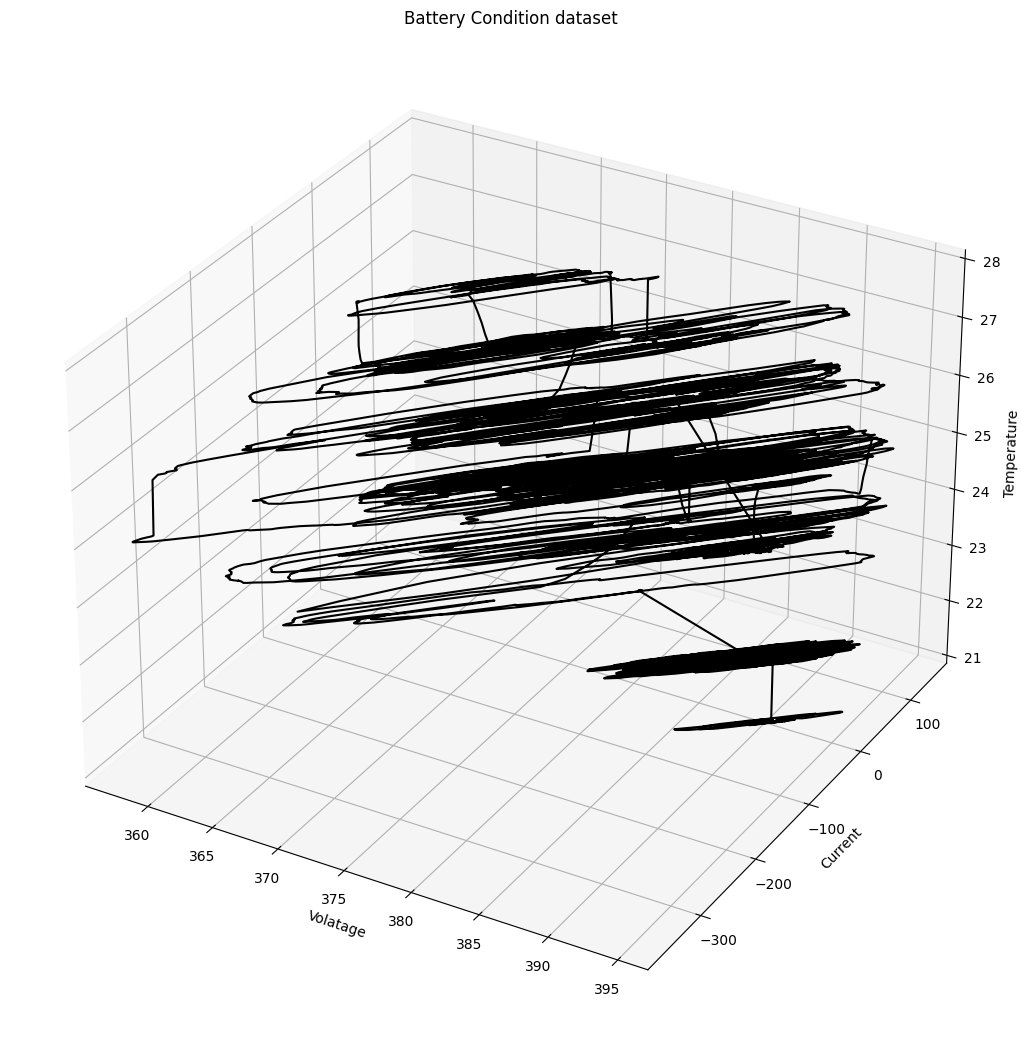

In [6]:
plt.figure(1,figsize=(13, 13))
#plt.figure(1).suptitle('Battery Condition dataset', fontsize=12)
# Bat_dataset 
ax_1=plt.subplot(projection='3d')
ax_1.plot(Bat_dataset[:,0],Bat_dataset[:,1],Bat_dataset[:,2],color='black')
ax_1.set_xlabel('Volatage')
ax_1.set_ylabel('Current')
ax_1.set_zlabel('Temperature')
#ax_1.margins(x=5, y=5, z=5) 
plt.title("Battery Condition dataset", fontsize=12) 
plt.savefig('Battery Condition dataset.png')

plt.grid()

In [7]:
#KMean
from sklearn_extra.cluster import KMedoids

In [8]:
model_kmedoids = KMedoids(n_clusters=20, random_state=0)
result_kmedoids=model_kmedoids.fit(Bat_dataset)

In [9]:
print("K-Medoids")
print("Dunn Index")
dunn_index = dunn_idx(Bat_dataset,model_kmedoids.labels_,model_kmedoids.cluster_centers_,pairwise_distances(Bat_dataset))
print(f"Dunn Index: {dunn_index}")
print("\n")

print("Davies Bouldin Index")
db_index = davies_bouldin_score(Bat_dataset, model_kmedoids.labels_)
print(f"Davies-Bouldin Index: {db_index}")
print("\n")

print("Xi-Beni Index")
xb_index = Xi_Beni_idx(Bat_dataset, model_kmedoids.labels_ ,model_kmedoids.cluster_centers_)
print(f"Davies-Bouldin Index: {xb_index}")
print("\n")

print("Silhouette Score")
ss_index = silhouette_score(Bat_dataset, model_kmedoids.labels_ )
print(f"Silhouette: {ss_index}")

K-Medoids
Dunn Index
Dunn Index: 1.0583044364032892


Davies Bouldin Index
Davies-Bouldin Index: 0.7588273333576913


Xi-Beni Index
Davies-Bouldin Index: 0.06321648554201668


Silhouette Score
Silhouette: 0.40533332795054494


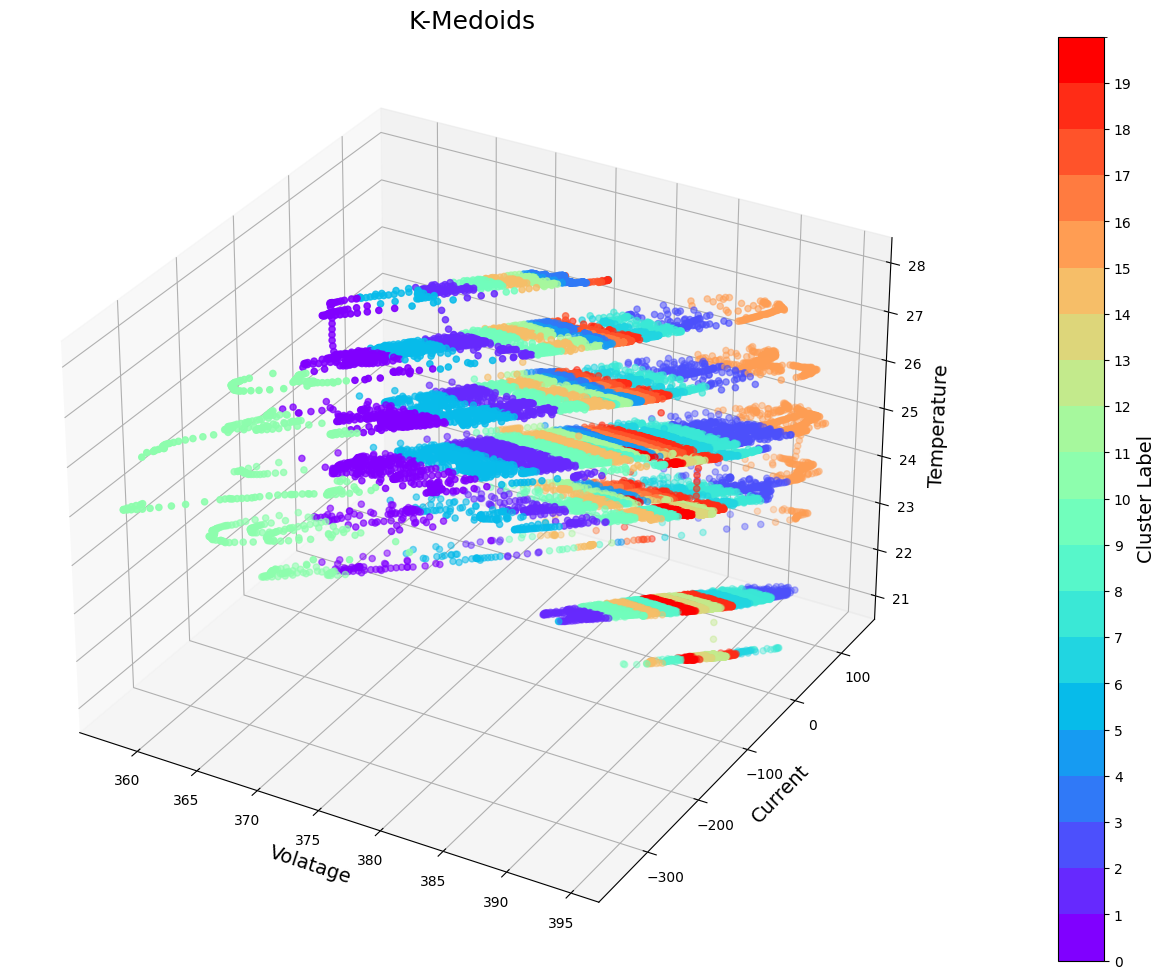

In [10]:
result_kmedoids_labels = result_kmedoids.labels_  
range_cls=result_kmedoids.labels_.max()-result_kmedoids.labels_.min()+1
cmap = plt.get_cmap('rainbow')
norm = BoundaryNorm(boundaries=np.arange(0, range_cls+1, 1), ncolors=cmap.N, clip=True)

plt.figure(2, figsize=(16, 12))
#plt.suptitle('K-Medoids', fontsize=18)

# Bat_dataset 
ax_2a=plt.subplot(1,1,1,projection='3d')
sc_2a=ax_2a.scatter(Bat_dataset[:,0],Bat_dataset[:,1],Bat_dataset[:,2],c=result_kmedoids_labels,cmap=cmap, norm=norm)
ax_2a.set_xlabel('Volatage', fontsize=14)
ax_2a.set_ylabel('Current', fontsize=14)
ax_2a.set_zlabel('Temperature', fontsize=14)
cbar = plt.colorbar(sc_2a, ax=ax_2a, pad=0.1)
cbar.set_label('Cluster Label', fontsize=14)
cbar.set_ticks(np.arange(0, range_cls, 1))
cbar.set_ticklabels(np.arange(0, range_cls, 1))
plt.title("K-Medoids", fontsize=18) 

plt.savefig('K-Medoids.png')
plt.show() 

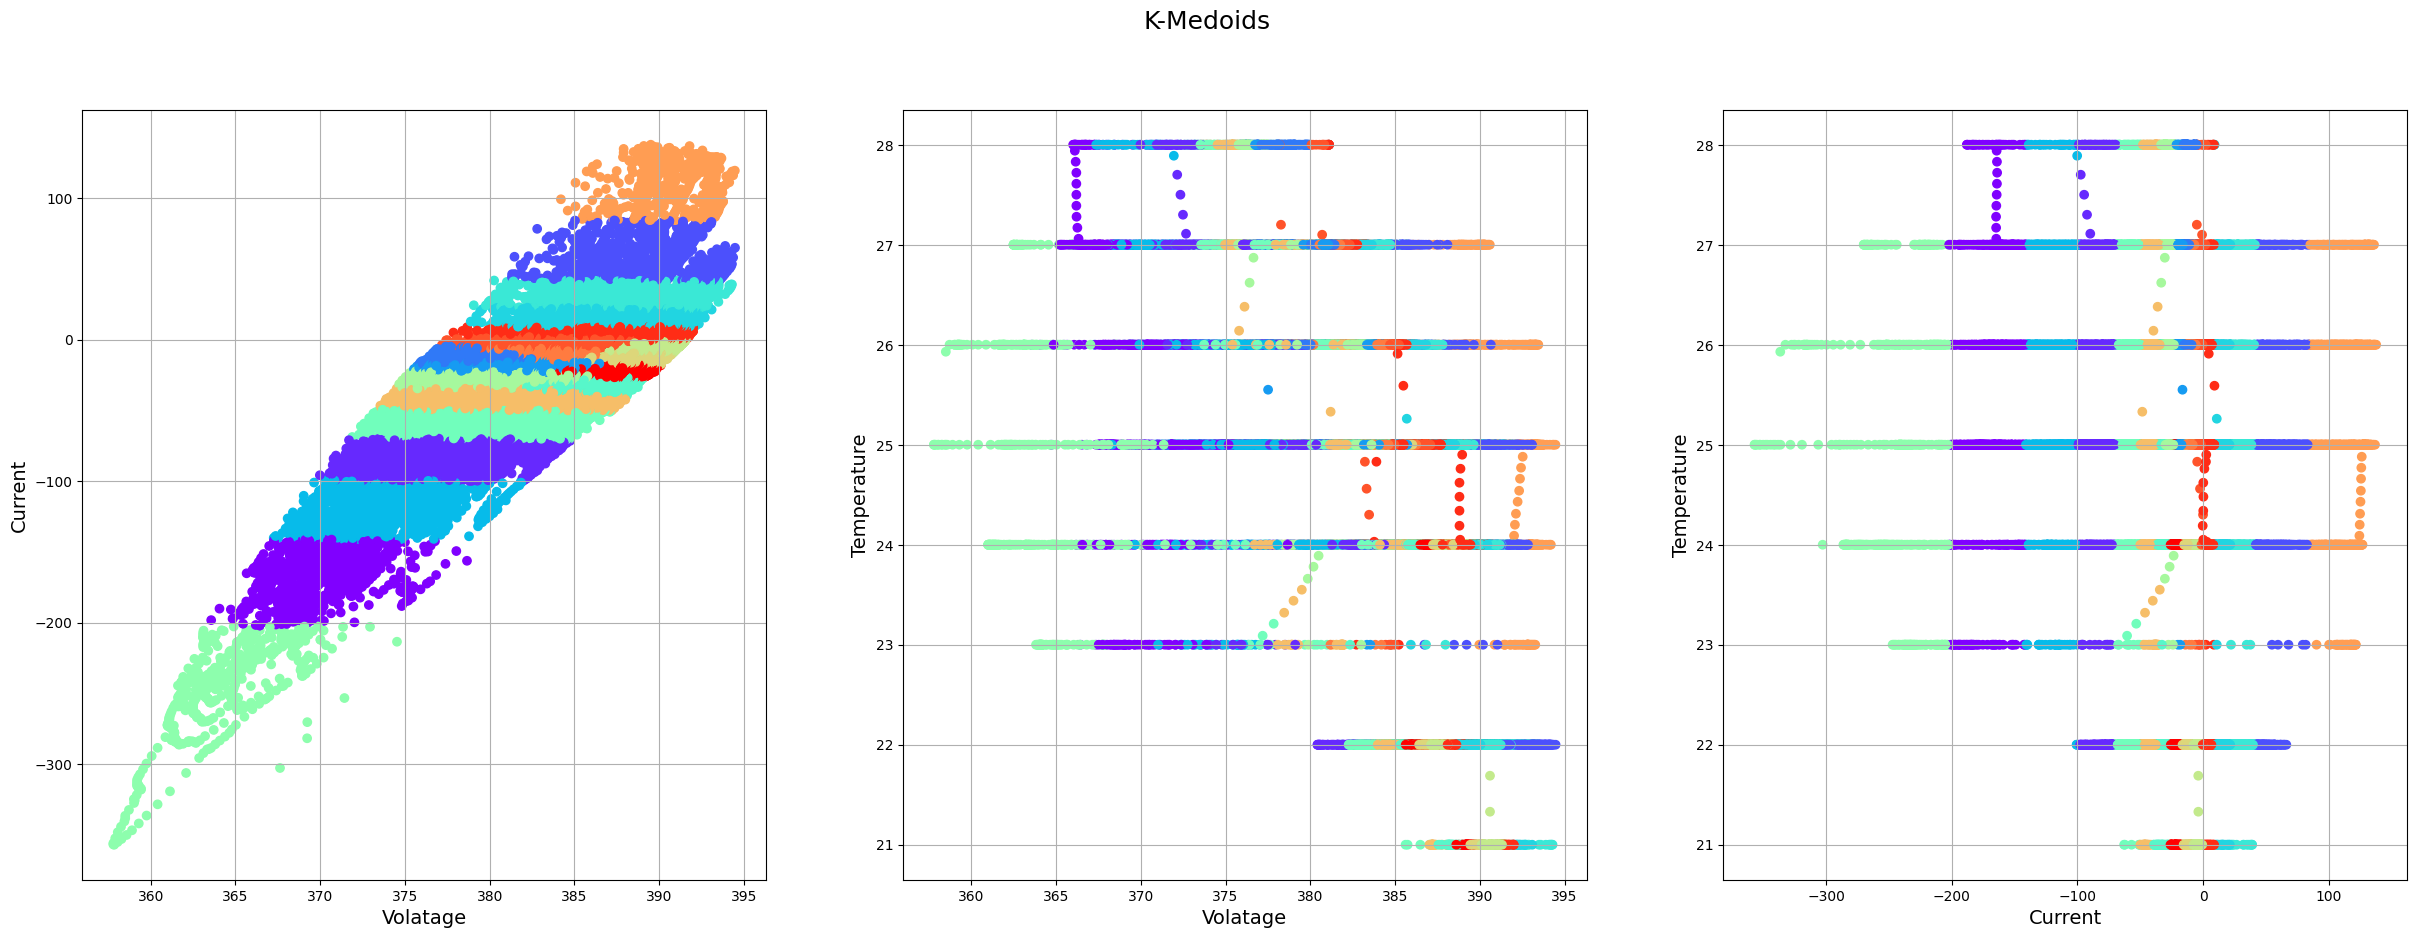

In [11]:
plt.figure(3, figsize=(30, 10))
plt.suptitle('K-Medoids', fontsize=18)

ax_2b=plt.subplot(1,3,1)
sc_2b=ax_2b.scatter(Bat_dataset[:,0],Bat_dataset[:,1],c=result_kmedoids_labels, cmap=cmap, norm=norm)
ax_2b.set_xlabel('Volatage', fontsize=14)
ax_2b.set_ylabel('Current', fontsize=14)
plt.grid()

ax_2c=plt.subplot(1,3,2)
sc_2c=ax_2c.scatter(Bat_dataset[:,0],Bat_dataset[:,2],c=result_kmedoids_labels,cmap=cmap, norm=norm)
ax_2c.set_xlabel('Volatage', fontsize=14)
ax_2c.set_ylabel('Temperature', fontsize=14)
plt.grid()

ax_2d=plt.subplot(1,3,3)
sc_2d=ax_2d.scatter(Bat_dataset[:,1],Bat_dataset[:,2],c=result_kmedoids_labels,cmap=cmap, norm=norm)
ax_2d.set_xlabel('Current', fontsize=14)
ax_2d.set_ylabel('Temperature', fontsize=14)

plt.grid()

# Save the plot
plt.savefig('K-Medoids_sub.png')
plt.show() 

In [12]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [13]:
model_ag = AgglomerativeClustering(n_clusters=20)
result_ag=model_ag.fit(Bat_dataset)

In [14]:
print("Agglomerative")
'''
print("Dunn Index")
dunn_index_ag = dunn_idx(Bat_dataset,model_ag.labels_,model_ag.cluster_centers_,pairwise_distances(Bat_dataset))
print(f"Dunn Index : {dunn_index_ag}")
print("\n")
'''
print("Davies Bouldin Index")
db_index_ag = davies_bouldin_score(Bat_dataset, model_ag.labels_)
print(f"Davies-Bouldin Index: {db_index_ag}")
print("\n")
'''
print("Xi-Beni Index")
xb_index_complex9 = Xi_Beni_idx(Bat_dataset, model_ag.labels_ ,model_ag.cluster_centers_)
print(f"Davies-Bouldin Index: {xb_index_ag}")
print("\n")
'''
print("Silhouette Score")
ss_index_ag = silhouette_score(Bat_dataset, model_ag.labels_ )
print(f"Silhouette Score: {ss_index_ag}")


Agglomerative
Davies Bouldin Index
Davies-Bouldin Index: 0.6985830862593183


Silhouette Score
Silhouette Score: 0.34849927134101866


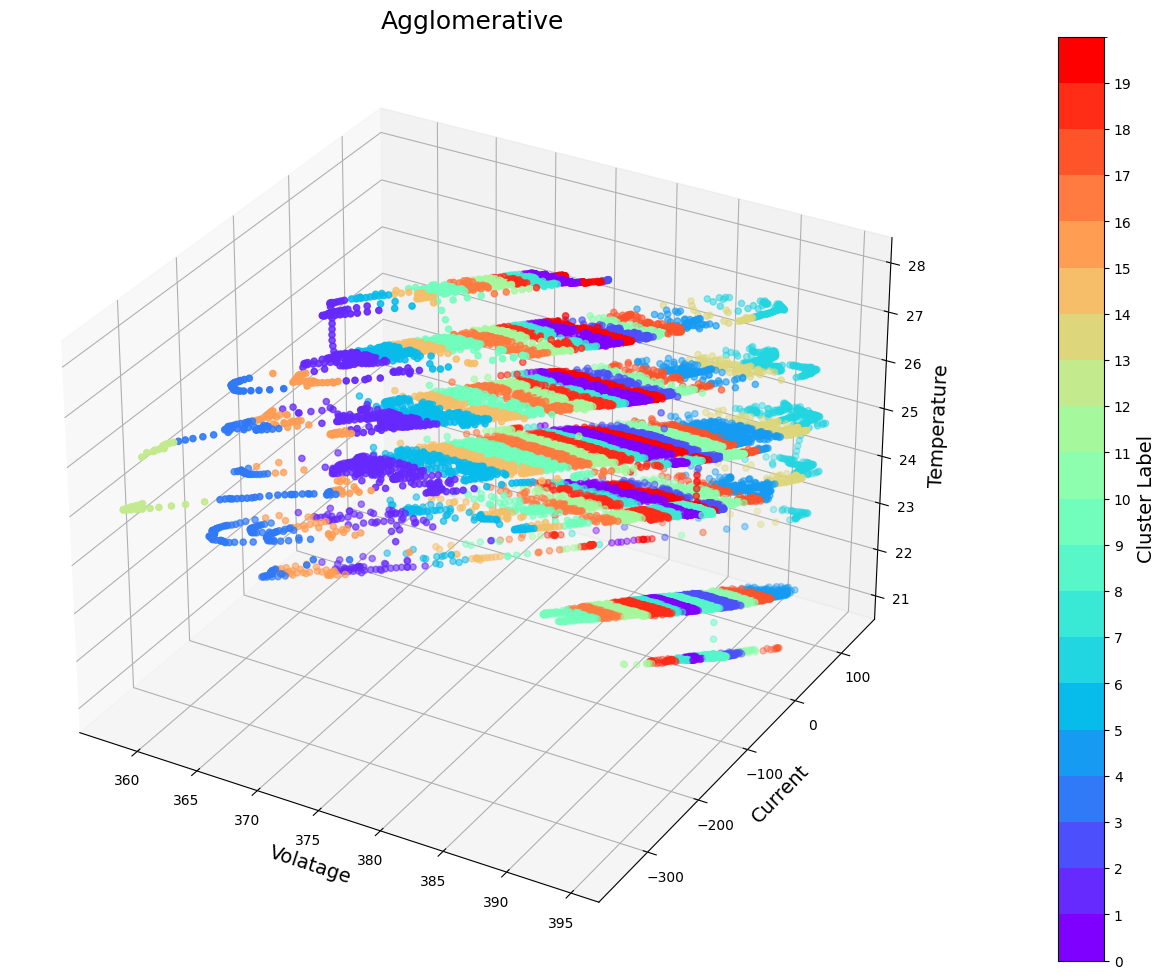

In [15]:
result_ag_labels = result_ag.labels_  
range_cls=result_ag.labels_.max()-result_ag.labels_.min()+1
cmap = plt.get_cmap('rainbow')
norm = BoundaryNorm(boundaries=np.arange(0, range_cls+1, 1), ncolors=cmap.N, clip=True)

plt.figure(4, figsize=(16, 12))
#plt.suptitle('K-Medoids', fontsize=18)

# Bat_dataset 
ax_4a=plt.subplot(1,1,1,projection='3d')
sc_4a=ax_4a.scatter(Bat_dataset[:,0],Bat_dataset[:,1],Bat_dataset[:,2],c=result_ag_labels,cmap=cmap,norm=norm)
ax_4a.set_xlabel('Volatage', fontsize=14)
ax_4a.set_ylabel('Current', fontsize=14)
ax_4a.set_zlabel('Temperature', fontsize=14)
cbar = plt.colorbar(sc_4a, ax=ax_4a, pad=0.1)
cbar.set_label('Cluster Label', fontsize=14)
cbar.set_ticks(np.arange(0, 20, 1))
cbar.set_ticklabels(np.arange(0, 20, 1))
plt.title("Agglomerative", fontsize=18) 

plt.savefig('Agglomerative.png')
plt.show() 

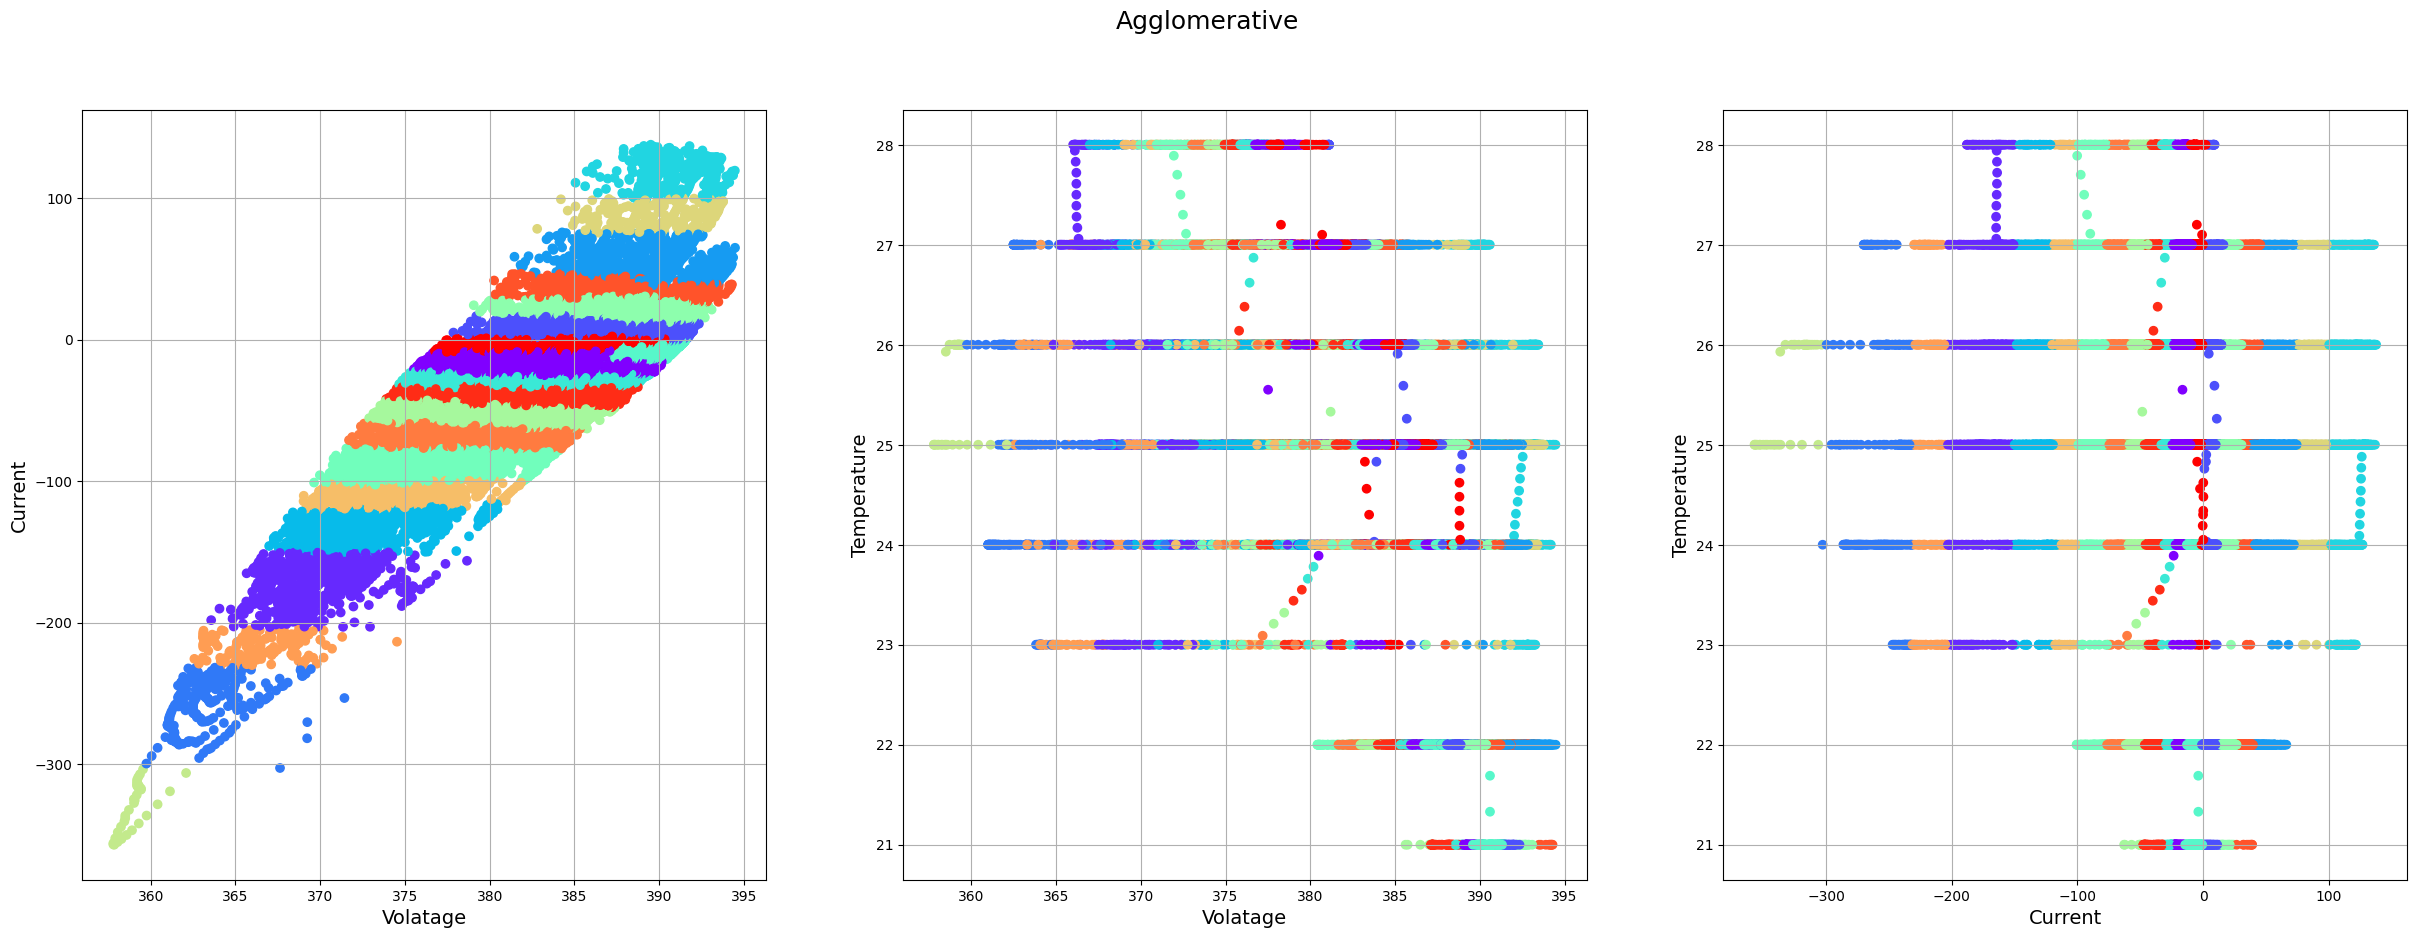

In [16]:
plt.figure(5, figsize=(30, 10))
plt.suptitle('Agglomerative', fontsize=18)

ax_5b=plt.subplot(1,3,1)
sc_5b=ax_5b.scatter(Bat_dataset[:,0],Bat_dataset[:,1],c=result_ag_labels,cmap=cmap,norm=norm)
ax_5b.set_xlabel('Volatage', fontsize=14)
ax_5b.set_ylabel('Current', fontsize=14)
plt.grid()

ax_5c=plt.subplot(1,3,2)
sc_5c=ax_5c.scatter(Bat_dataset[:,0],Bat_dataset[:,2],c=result_ag_labels,cmap=cmap,norm=norm)
ax_5c.set_xlabel('Volatage', fontsize=14)
ax_5c.set_ylabel('Temperature', fontsize=14)
plt.grid()

ax_5d=plt.subplot(1,3,3)
sc_5d=ax_5d.scatter(Bat_dataset[:,1],Bat_dataset[:,2],c=result_ag_labels,cmap=cmap,norm=norm)
ax_5d.set_xlabel('Current', fontsize=14)
ax_5d.set_ylabel('Temperature', fontsize=14)
plt.grid()

# Save the plot
plt.savefig('Agglomerative_sub.png')
plt.show() 

In [17]:
#MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth

In [18]:
bandwidth = estimate_bandwidth(Bat_dataset, quantile=0.2, n_samples=500)
model_ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
result_ms=model_ms.fit(Bat_dataset)

In [19]:
print("MeanShift")
print("Dunn Index")
dunn_index_complex9 = dunn_idx(Bat_dataset,model_ms.labels_,model_ms.cluster_centers_,pairwise_distances(Bat_dataset))
print(f"Dunn Index of complex9: {dunn_index_complex9}")
print("\n")

print("Davies Bouldin Index")
db_index_complex9 = davies_bouldin_score(Bat_dataset, model_ms.labels_)
print(f"Davies-Bouldin Index of complex9: {db_index_complex9}")
print("\n")

print("Xi-Beni Index")
xb_index_complex9 = Xi_Beni_idx(Bat_dataset, model_ms.labels_ ,model_ms.cluster_centers_)
print(f"Davies-Bouldin Index of complex9: {xb_index_complex9}")
print("\n")

print("Silhouette Score")
ss_index_complex9 = silhouette_score(Bat_dataset, model_ms.labels_ )
print(f"Silhouette Score of complex9: {ss_index_complex9}")

MeanShift
Dunn Index
Dunn Index of complex9: 0.28814407102132195


Davies Bouldin Index
Davies-Bouldin Index of complex9: 0.41957203806635807


Xi-Beni Index
Davies-Bouldin Index of complex9: 0.09914283561759024


Silhouette Score
Silhouette Score of complex9: 0.6340458712092685


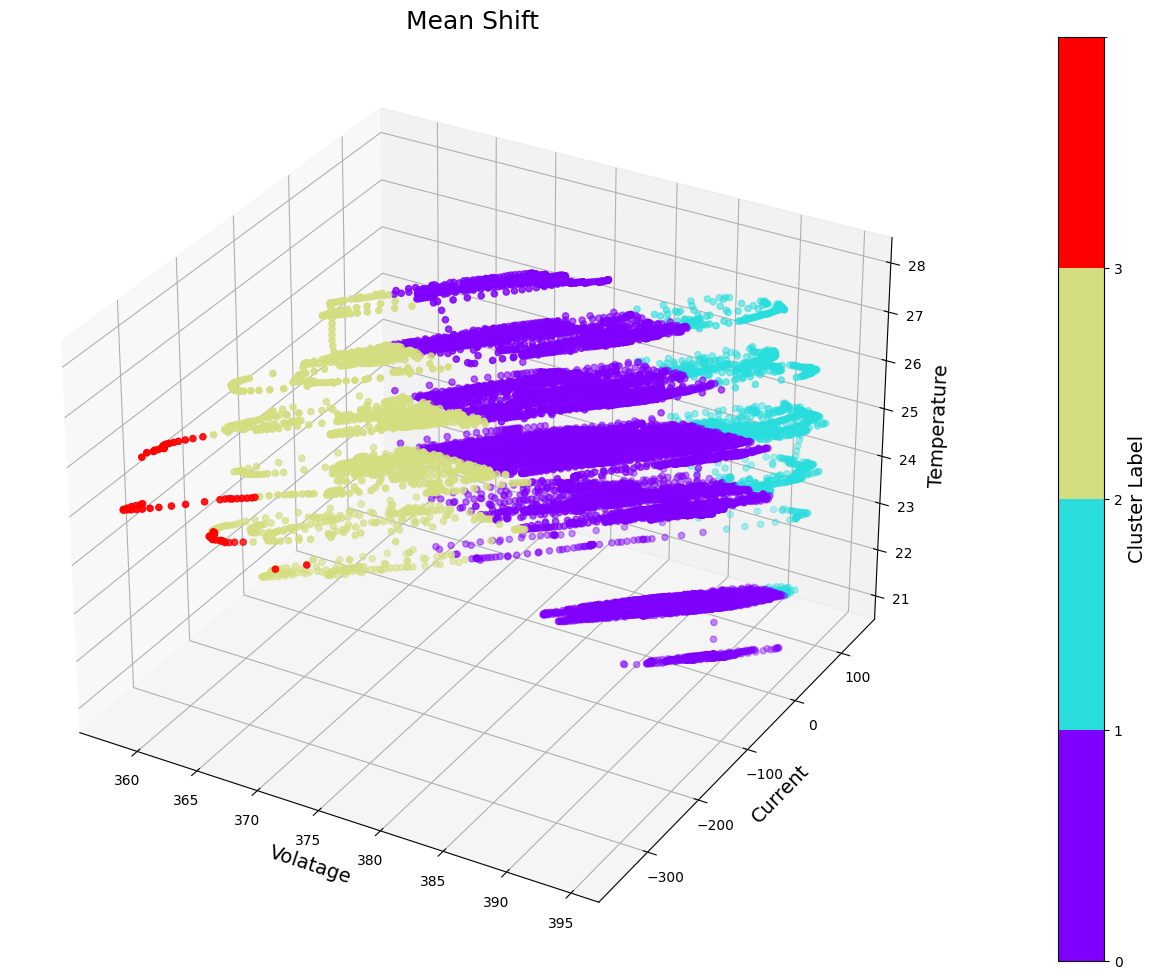

In [20]:
result_ms_labels = result_ms.labels_  
range_cls=result_ms.labels_.max()-result_ms.labels_.min()+1
cmap = plt.get_cmap('rainbow')
norm = BoundaryNorm(boundaries=np.arange(0, range_cls+1, 1), ncolors=cmap.N, clip=True)

plt.figure(6, figsize=(16, 12))
#plt.suptitle('K-Medoids', fontsize=18)

# Bat_dataset 
ax_4a=plt.subplot(1,1,1,projection='3d')
sc_4a=ax_4a.scatter(Bat_dataset[:,0],Bat_dataset[:,1],Bat_dataset[:,2],c=result_ms_labels,cmap=cmap,norm=norm)
ax_4a.set_xlabel('Volatage', fontsize=14)
ax_4a.set_ylabel('Current', fontsize=14)
ax_4a.set_zlabel('Temperature', fontsize=14)
cbar = plt.colorbar(sc_4a, ax=ax_4a, pad=0.1)
cbar.set_label('Cluster Label', fontsize=14)
cbar.set_ticks(np.arange(0, range_cls, 1))
cbar.set_ticklabels(np.arange(0, range_cls, 1))
plt.title("Mean Shift", fontsize=18) 

plt.savefig('MeanShift.png')
plt.show() 

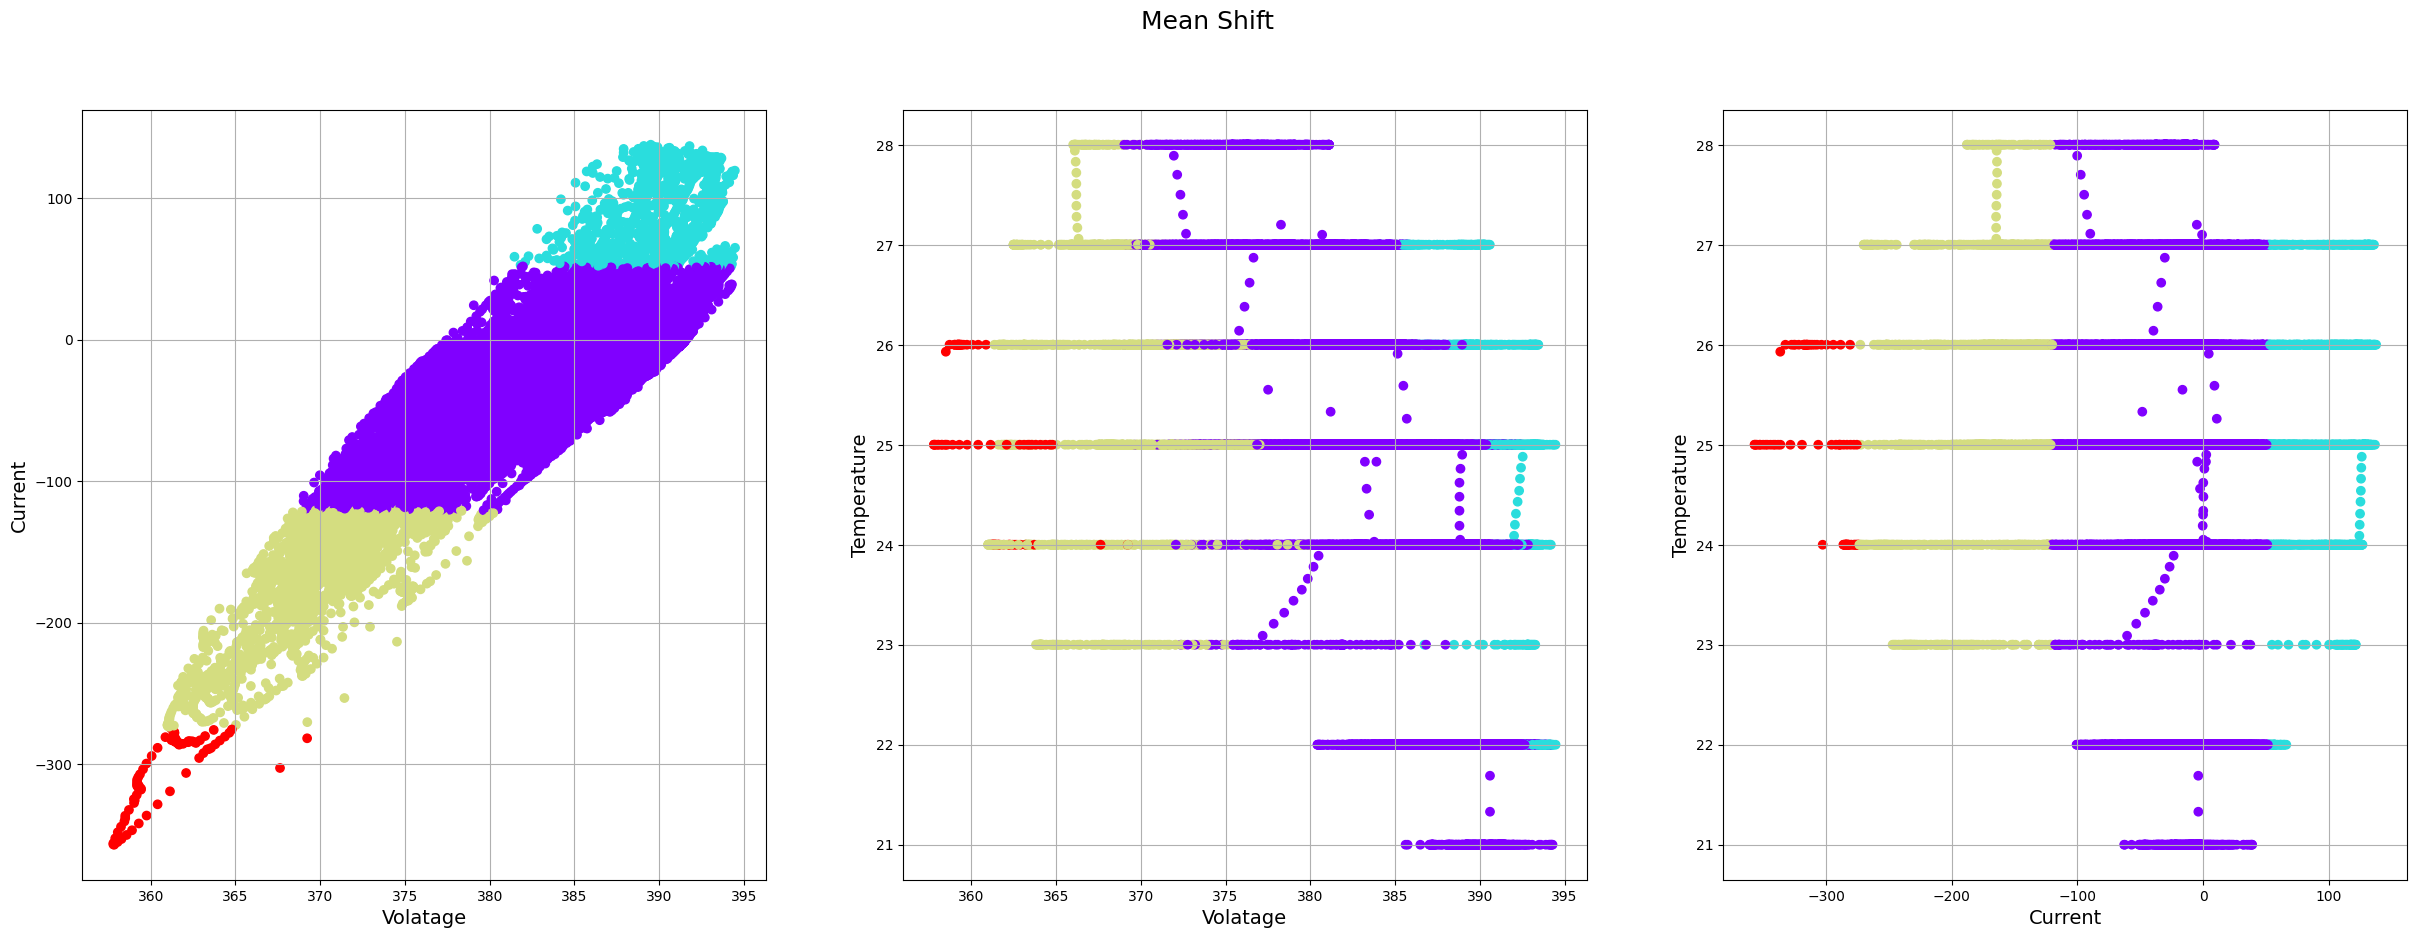

In [21]:
plt.figure(5, figsize=(30, 10))
plt.suptitle('Mean Shift', fontsize=18)

ax_5b=plt.subplot(1,3,1)
sc_5b=ax_5b.scatter(Bat_dataset[:,0],Bat_dataset[:,1],c=result_ms_labels,cmap=cmap,norm=norm)
ax_5b.set_xlabel('Volatage', fontsize=14)
ax_5b.set_ylabel('Current', fontsize=14)
plt.grid()

ax_5c=plt.subplot(1,3,2)
sc_5c=ax_5c.scatter(Bat_dataset[:,0],Bat_dataset[:,2],c=result_ms_labels,cmap=cmap,norm=norm)
ax_5c.set_xlabel('Volatage', fontsize=14)
ax_5c.set_ylabel('Temperature', fontsize=14)
plt.grid()

ax_5d=plt.subplot(1,3,3)
sc_5d=ax_5d.scatter(Bat_dataset[:,1],Bat_dataset[:,2],c=result_ms_labels,cmap=cmap,norm=norm)
ax_5d.set_xlabel('Current', fontsize=14)
ax_5d.set_ylabel('Temperature', fontsize=14)
plt.grid()

# Save the plot
plt.savefig('Mean Shift_sub.png')
plt.show() 

In [22]:
#DBScan
from sklearn.cluster import DBSCAN

In [23]:
model_dbscan=DBSCAN(eps=8, min_samples=1000)
result_dbscan=model_dbscan.fit(Bat_dataset)

In [24]:
model_dbscan_labels = model_dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(model_dbscan_labels)) - (1 if -1 in model_dbscan_labels else 0)
n_noise_ = list(model_dbscan_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 5690


In [25]:
print("DBSCAN")
'''
print("Dunn Index")
dunn_index = dunn_idx(Bat_dataset, result_dbscan.labels_,result_dbscan.cluster_centers_,pairwise_distances(Bat_dataset))
print(f"Dunn Index:  {dunn_index}")
print("\n")
'''
print("Davies Bouldin Index")
db_index = davies_bouldin_score(Bat_dataset, model_dbscan.labels_)
print(f"Davies-Bouldin: {db_index}")
print("\n")
'''
print("Xi-Beni Index")
xb_index = Xi_Beni_idx(Bat_dataset, model_dbscan.labels_ ,model_dbscan.cluster_centers_)
print(f"Davies-Bouldin Index of complex9: {xb_index}")
print("\n")
'''
print("Silhouette Score")
ss_index = silhouette_score(Bat_dataset, model_dbscan.labels_ )
print(f"Silhouette Score of complex9: {ss_index}")


DBSCAN
Davies Bouldin Index
Davies-Bouldin: 2.253279233269322


Silhouette Score
Silhouette Score of complex9: 0.6291392486912653


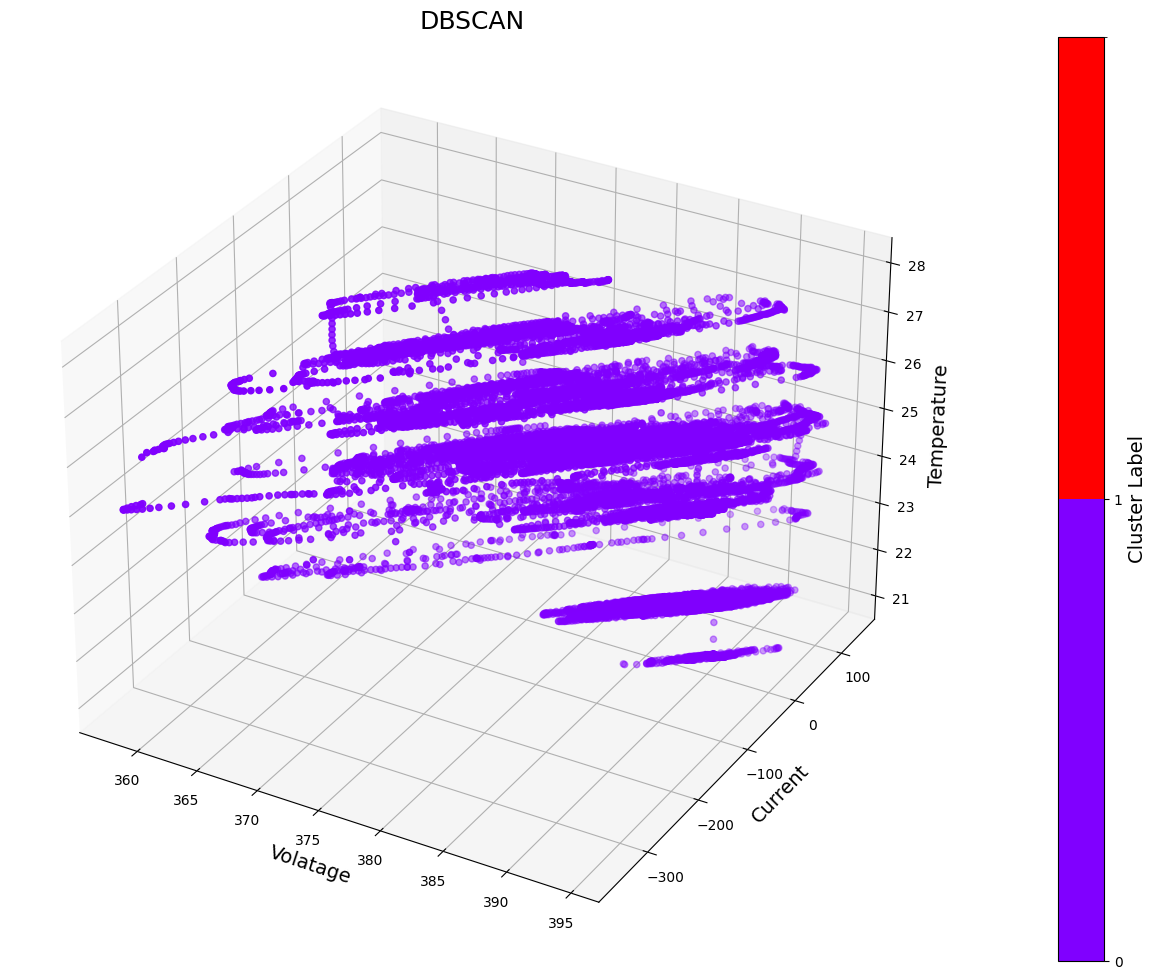

In [26]:
result_dbscan_labels = result_dbscan.labels_  
range_cls=result_dbscan.labels_.max()-result_dbscan.labels_.min()+1
cmap = plt.get_cmap('rainbow')
norm = BoundaryNorm(boundaries=np.arange(0, range_cls+1, 1), ncolors=cmap.N, clip=True)

plt.figure(6, figsize=(16, 12))
#plt.suptitle('K-Medoids', fontsize=18)

# Bat_dataset 
ax_4a=plt.subplot(1,1,1,projection='3d')
sc_4a=ax_4a.scatter(Bat_dataset[:,0],Bat_dataset[:,1],Bat_dataset[:,2],c=result_dbscan_labels,cmap=cmap,norm=norm)
ax_4a.set_xlabel('Volatage', fontsize=14)
ax_4a.set_ylabel('Current', fontsize=14)
ax_4a.set_zlabel('Temperature', fontsize=14)
cbar = plt.colorbar(sc_4a, ax=ax_4a, pad=0.1)
cbar.set_label('Cluster Label', fontsize=14)
cbar.set_ticks(np.arange(0, range_cls, 1))
cbar.set_ticklabels(np.arange(0, range_cls, 1))
plt.title("DBSCAN", fontsize=18) 

plt.savefig('DBSCAN.png')
plt.show() 

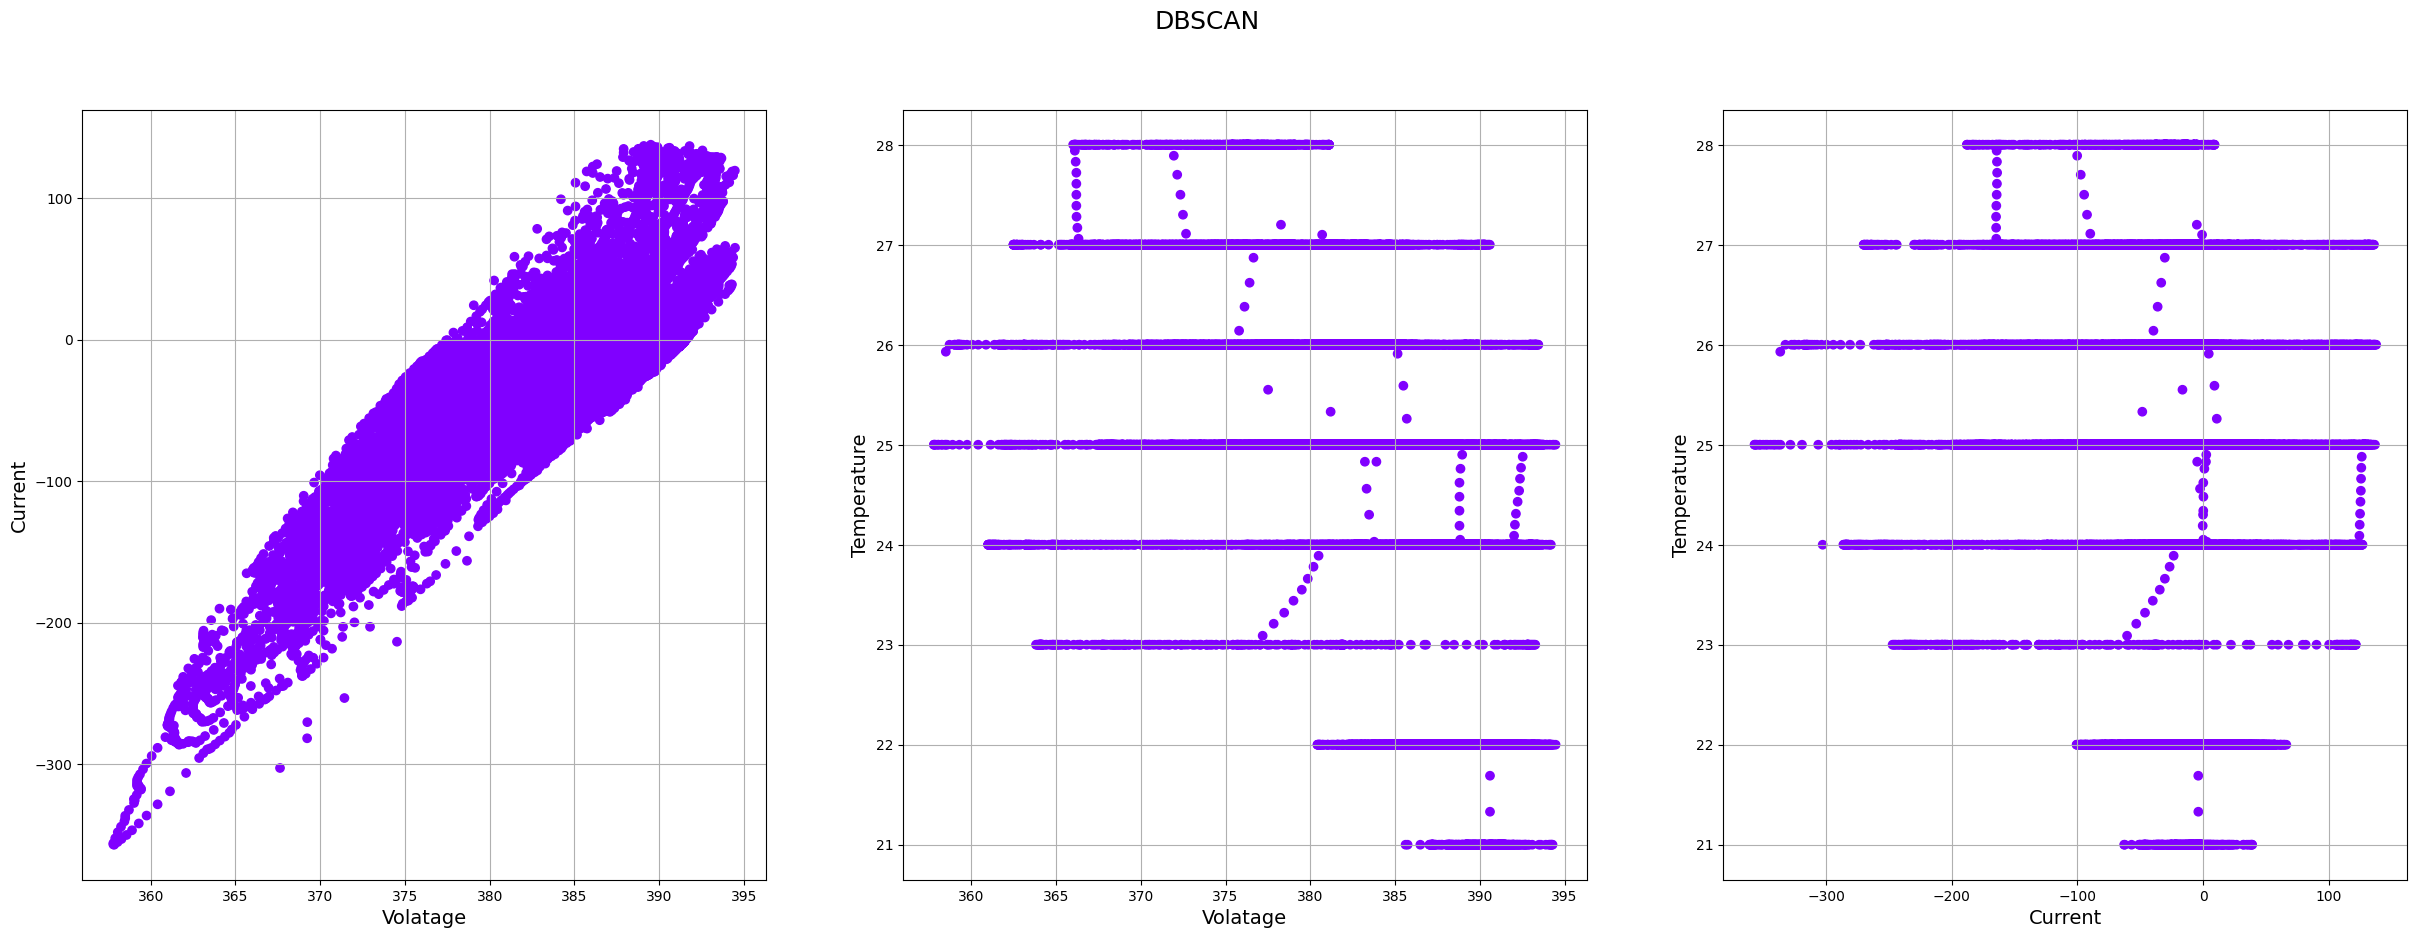

In [27]:
plt.figure(5, figsize=(30, 10))
plt.suptitle('DBSCAN', fontsize=18)

ax_5b=plt.subplot(1,3,1)
sc_5b=ax_5b.scatter(Bat_dataset[:,0],Bat_dataset[:,1],c=result_dbscan_labels,cmap=cmap,norm=norm)
ax_5b.set_xlabel('Volatage', fontsize=14)
ax_5b.set_ylabel('Current', fontsize=14)
plt.grid()

ax_5c=plt.subplot(1,3,2)
sc_5c=ax_5c.scatter(Bat_dataset[:,0],Bat_dataset[:,2],c=result_dbscan_labels,cmap=cmap,norm=norm)
ax_5c.set_xlabel('Volatage', fontsize=14)
ax_5c.set_ylabel('Temperature', fontsize=14)
plt.grid()

ax_5d=plt.subplot(1,3,3)
sc_5d=ax_5d.scatter(Bat_dataset[:,1],Bat_dataset[:,2],c=result_dbscan_labels,cmap=cmap,norm=norm)
ax_5d.set_xlabel('Current', fontsize=14)
ax_5d.set_ylabel('Temperature', fontsize=14)
plt.grid()

# Save the plot
plt.savefig('DBSCAN_sub.png')
plt.show() 